<h2>Helper Notebook for Creating Code Flow Data</h2>

In [1]:
# REYeker lib
import modules.rEYEkerAnalysis as rEYEker

# lib for dataframes
import pandas as pd

import numpy as np

# lib for plotting
from matplotlib import pyplot as plt

# lib for crerating paths
from pathlib import Path

import random

In [2]:
def draw_lines(sheet_config, width):
    height_of_line = sheet_config.loc[1]['stop'] - sheet_config.loc[1]['start']
    
    for idx, val in sheet_config.iterrows():
        plt.text(0, val['start']+height_of_line/2, str(idx))
        plt.plot([0, width], [val['start'], val['start']], color='grey')
        
def draw_heat(img, aoi_mask, aoi_colors):
    for height in range(img.shape[0]):
        for width in range(img.shape[1]):
            if aoi_mask[height, width] == 0:
                break
            img[height, width] = 0.4 * img[height, width] + 0.6 * aoi_colors[aoi_mask[height, width]]

<h3>Config</h3>

In [3]:
#image to load
image_path = 'images/TI/TI_Fibonacci.png'

#path for line sheet
sheet_patrh = './data/code_flow/TI_Fibonacci.xlsx'

#name for excel file saved in ./data/code_flow folder
save_as = 'AOI_TI_Fibonacci'


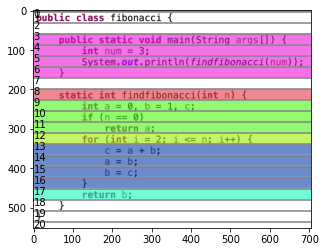

In [4]:
sheet_config = pd.read_excel(sheet_patrh, sheet_name="config")


img = rEYEker.load_image(image_path)
aoi_mask = np.zeros((img.shape[0], img.shape[1])).astype(int)

aoi_regions = [
    #line, name
    (-1, "none"),
    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    
    (8, "Iterative definition"),
    (9, "Pre calculation"),
    (10, "Pre calculation"),
    (11, "Pre calculation"),
    (12, "Iteration Condition"),
    (13, "Iteration Step"),
    (14, "Iteration Step"),
    (15, "Iteration Step"),
    (16, "Iteration Step"),
    (17, "Return Result"),
]

aoi_names = list(dict.fromkeys([name for (line, name) in aoi_regions]))

for region in aoi_regions:
    if region[0] == -1:
        continue
    aoi_mask[sheet_config.loc[region[0]]['start']:sheet_config.loc[region[0]]['stop'], :] = aoi_names.index(region[1])

aoi_colors = [np.array([1.0, 1.0, 1.0])]

for i in range(np.amax(aoi_mask)):
    aoi_colors.append(np.array([random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)]))  

draw_heat(img, aoi_mask, aoi_colors)
draw_lines(sheet_config, img.shape[1])
        
plt.imshow(img);

save Data to Excel

In [76]:
cols = ["startHeight", "stopHeight", "startWidth", "stopWidth", "Name"]
tmp_list = []
for region in aoi_regions:
    if region[0] == -1:
        continue
    tmp_list.append([sheet_config.loc[region[0]]['start'], sheet_config.loc[region[0]]['stop'],0, img.shape[1], region[1]])
    
df_config = pd.DataFrame(tmp_list, columns=cols)

folder = "./data/aoi_categorized/"
Path(folder).mkdir(parents=True, exist_ok=True)

writer = pd.ExcelWriter(folder + save_as + '.xlsx', engine='xlsxwriter')
df_config.to_excel(writer, index=False)

writer.save()